## 1.0 **Analyzing COVID-19 Impact on Unemployment in India**

## 2.0 About Data
- Data: Unemployment in India
- **Dataset:** 🔗 [*link*]( https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india)

**MetaData:**

Dataset contains unemployment statistics for Indian states including date of recording, measured monthly. It includes rates of unemployment, employed individuals, and labor participation among 16-64 year-olds.

 **Data Columns and Descriptions**

The dataset provides insights into the unemployment scenario across different Indian states:

| Column Name                         | Description                                                                                     |
|-------------------------------------|-------------------------------------------------------------------------------------------------|
| States                              | The states within India.                                                                        |
| Date                                | The date when the unemployment rate was recorded.                                                |
| Measuring Frequency                 | The frequency at which measurements were taken (Monthly).                                         |
| Estimated Unemployment Rate (%)     | The percentage of individuals unemployed in each state of India.                                 |
| Estimated Employed Individuals      | The count of people currently employed.                                                          |
| Estimated Labour Participation Rate (%) | The proportion of the working population (age group: 16-64 years) participating in the labor force, either employed or actively seeking employment. |


## 2.1 Task:
Analyze trends in unemployment across Indian states over time, focusing on monthly data. Investigate factors affecting unemployment rates and explore variations in labor participation and employment levels. Provide insights into the impact of these trends on the Indian job market.

## 2.2 Objectives:
Our main goal is to understand how the COVID-19 pandemic affected jobs in India. We're looking at data that tells us about unemployment rates in different states of India. This data includes important details like the names of the states, dates, how often measurements were taken, the percentage of people unemployed, the number of people estimated to be employed, and the percentage of people participating in the workforce.

## 2.3 Kernel Version Used:
- Python 3.11.0

## 3.0 Import Libraries
We will utilize the following libraries for our analysis:

1. **Pandas:** A powerful data manipulation and analysis library.
2. **NumPy:** A versatile numerical computing library.
3. **Matplotlib:** A data visualization library for creating static, interactive, and animated plots.
4. **Seaborn:** A statistical data visualization library that enhances Matplotlib's capabilities.

These libraries are essential for conducting a thorough analysis and visualization of the dataset.


In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 4.0  Data Loading, Exploration & Wrangling

### 4.1 Load the csv file with the pandas

In [2]:
# Load dataset and create a dataframe 
df = pd.read_csv('Unemployment in India.csv')

### 4.2 Get a sneak peek of your data
Gain an immediate overview of your dataset with a concise line of code. This allows you to efficiently inspect the initial rows of your dataset, providing a snapshot of the data structure without the need to navigate through the entire file.

In [3]:
# View top 5 rows
df.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural

In [4]:
# check the columns
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [5]:
# Removing spaces before and after the column names
df.columns = df.columns.str.strip()
df

Region         Date Frequency  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019   Monthly                             3.65   
1    Andhra Pradesh   30-06-2019   Monthly                             3.05   
2    Andhra Pradesh   31-07-2019   Monthly                             3.75   
3    Andhra Pradesh   31-08-2019   Monthly                             3.32   
4    Andhra Pradesh   30-09-2019   Monthly                             5.17   
..              ...          ...       ...                              ...   
763             NaN          NaN       NaN                              NaN   
764             NaN          NaN       NaN                              NaN   
765             NaN          NaN       NaN                              NaN   
766             NaN          NaN       NaN                              NaN   
767             NaN          NaN       NaN                              NaN   

     Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0            11999139.0                                    43.24  Rural  
1            11755881.0                                    42.05  Rural  
2            12086707.0                                    43.50  Rural  
3            12285693.0                                    43.97  Rural  
4            12256762.0                                    44.68  Rural  
..                  ...                                      ...    ...  
763                 NaN                                      NaN    NaN  
764                 NaN                                      NaN    NaN  
765                 NaN                                      NaN    NaN  
766                 NaN                                      NaN    NaN  
767                 NaN                                      NaN    NaN  

[768 rows x 7 columns]

In [6]:
# View the number of rows and columns
print(f"The dataframe has {df.shape[0]} rows and {df.shape[1]} columns")

The dataframe has 768 rows and 7 columns


Not enough, let's have a look on the columns and their data types using detailed info function

In [7]:
# Deatailed information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


### 4.3 Descriptive Statistics

Employing descriptive statistics to succinctly summarize and comprehend the fundamental features of the dataset.


In [8]:
# Descriptive statistics
df.describe()

Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                                  72.570000

### Descriptive Statistics Observations 

1. The dataset spans from May 2019 to June 2020, with an average unemployment rate of approximately 11.79% and an average labor participation rate of around 42.63%.
2. Unemployment rates vary widely, ranging from 0% to 76.74%, with significant fluctuations over time, while employed individuals range from approximately 49,420 to 45,777,510

### 4.4 Handling Missing Values


In [9]:
# Check for missing values  
print(df.isnull().sum())

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64


### 4.5 Drop Missing Values


In [10]:
# Drop rows with missing values
df = df.dropna()

In [11]:
# check missing values again
print(df.isnull().sum())

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64


#### Milestone 1: *Hence no Missing values found* 👥

### 4.6 Check Duplicates


In [12]:
# Check for duplicates
print(df.duplicated().sum())

0


#### Milestone 2: *Hence no duplicates found* 👥

## **5.0 Comprehensive Exploratory Analysis and Visual Insights**

### 5.1 Adding Extra Columns To The Dataframe

In [13]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [14]:
# Adding Day, Month, and Year
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

# Importing Warnings library
import warnings

# Ignoring unwanted warnings
warnings.filterwarnings("ignore")

df

Region       Date Frequency  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh 2019-05-31   Monthly                             3.65   
1    Andhra Pradesh 2019-06-30   Monthly                             3.05   
2    Andhra Pradesh 2019-07-31   Monthly                             3.75   
3    Andhra Pradesh 2019-08-31   Monthly                             3.32   
4    Andhra Pradesh 2019-09-30   Monthly                             5.17   
..              ...        ...       ...                              ...   
749     West Bengal 2020-02-29   Monthly                             7.55   
750     West Bengal 2020-03-31   Monthly                             6.67   
751     West Bengal 2020-04-30   Monthly                            15.63   
752     West Bengal 2020-05-31   Monthly                            15.22   
753     West Bengal 2020-06-30   Monthly                             9.86   

     Estimated Employed  Estimated Labour Participation Rate (%)   Area  Day  \
0            11999139.0                                    43.24  Rural   31   
1            11755881.0                                    42.05  Rural   30   
2            12086707.0                                    43.50  Rural   31   
3            12285693.0                                    43.97  Rural   31   
4            12256762.0                                    44.68  Rural   30   
..                  ...                                      ...    ...  ...   
749          10871168.0                                    44.09  Urban   29   
750          10806105.0                                    43.34  Urban   31   
751           9299466.0                                    41.20  Urban   30   
752           9240903.0                                    40.67  Urban   31   
753           9088931.0                                    37.57  Urban   30   

         Month  Year  
0          May  2019  
1         June  2019  
2         July  2019  
3       August  2019  
4    September  2019  
..         ...   ...  
749   February  2020  
750      March  2020  
751      April  2020  
752        May  2020  
753       June  2020  

[740 rows x 10 columns]

In [15]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Day', 'Month', 'Year'],
      dtype='object')

### 5.2 Summay Statistics

In [16]:
# Summary statistics
print(df.describe())

# Mean unemployment rate
mean_unemployment = df['Estimated Unemployment Rate (%)'].mean()
print(f'Mean Unemployment Rate: {mean_unemployment:.2f}%')

# Median unemployment rate
median_unemployment = df['Estimated Unemployment Rate (%)'].median()
print(f'Median Unemployment Rate: {median_unemployment:.2f}%')

# Standard deviation of unemployment rate
std_unemployment = df['Estimated Unemployment Rate (%)'].std()
print(f'Standard Deviation of Unemployment Rate: {std_unemployment:.2f}%')

                                Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  \
count        7.400000e+02                               740.000000   
mean         7.204460e+06                                42.630122   
min          4.942000e+04                                13.330000   
25%          1.190404e+06                                38.06

### 5.3 Unemployment rate over time

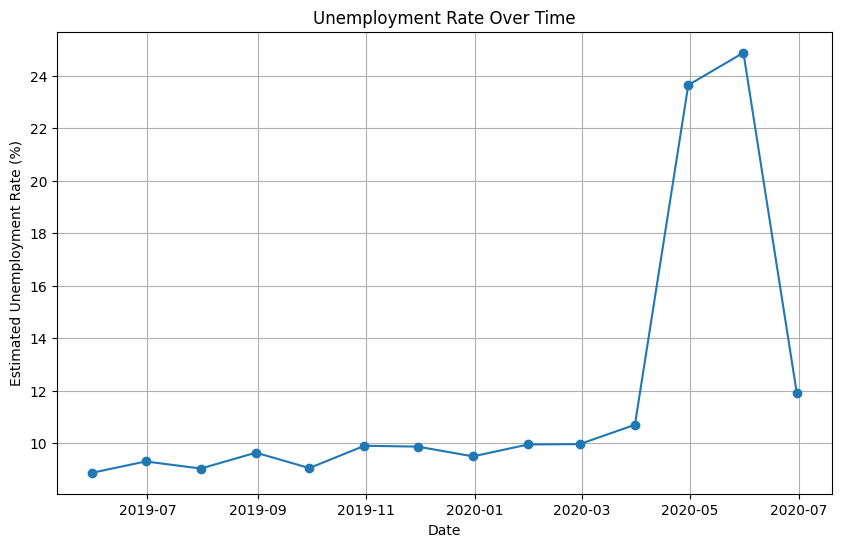

In [17]:
import matplotlib.pyplot as plt

# Group the data by Date and calculate the mean unemployment rate for each date
mean_unemployment_over_time = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()


The plot reveals periods of particularly high unemployment rates, exceeding 20%, in November and December of 2019, followed by another in February of 2020.

### 5.4 Bar Plot of Average Estimated Unployment Rate

In [18]:
# Bar Plot of Average Estimated Unployment Rate
fig = px.bar(df, x = 'Region', y = "Estimated Unemployment Rate (%)", color = "Region", title = "Average unemploment Rate")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

Region with the highest unemployment rate is Tripura.

### 5.5 Bar Plot of Estimated Employed people in every month

In [19]:
# Bar Plot of Estimated Employed people in every month
fig = px.bar(df, x = 'Month', y = 'Estimated Employed', color = 'Month', title = 'Estimated Employed People')
fig.show()

### 5.7 Sunburst plot

In [20]:
# Create the Sunburst plot
fig = px.sunburst(df, path=['Area', 'Region'], values='Estimated Unemployment Rate (%)', title='Sunburst Plot of Estimated Unemployment Rate by Region and Area')
fig.show()

### 5.8  Box plot

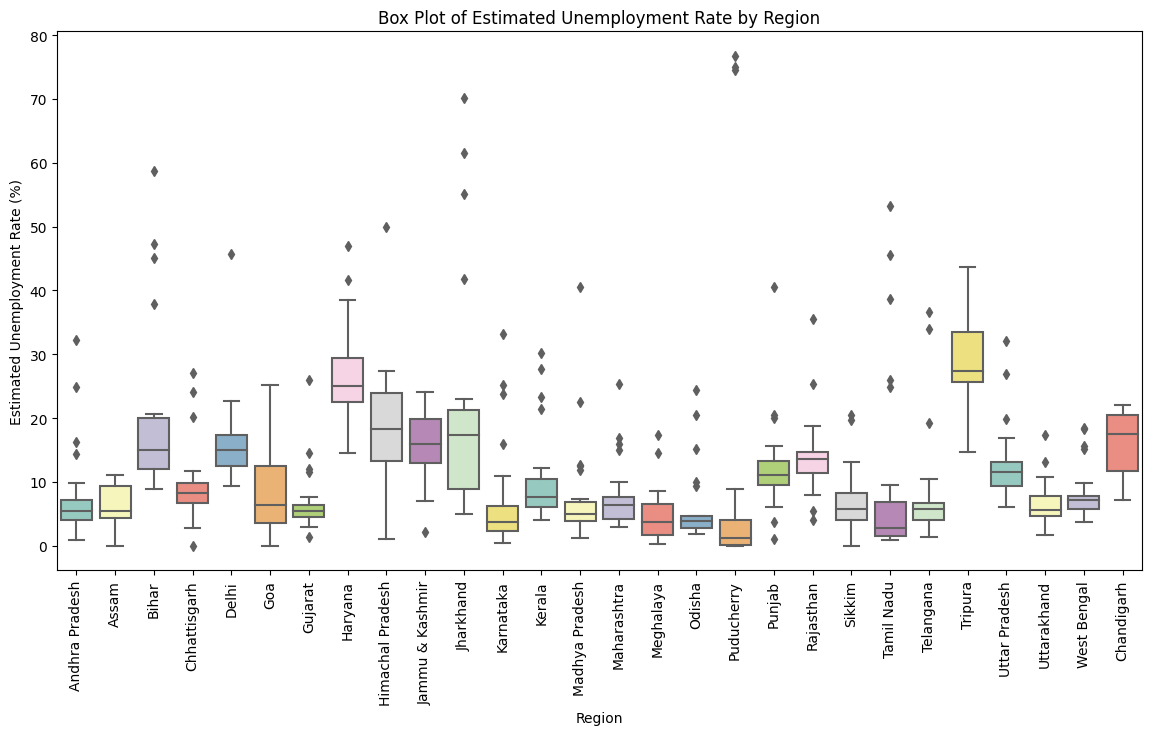

In [21]:

plt.figure(figsize=(14, 7))
# Create the box plot with separate colors for each region
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df, palette='Set3')
# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')
# Add title and axis labels
plt.title('Box Plot of Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')

# Show the plot
plt.show()


### 5.9 Correlation Analysis

In [22]:
# Correlation Analysis
correlation = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()
print(correlation)

                                         Estimated Unemployment Rate (%)  \
Estimated Unemployment Rate (%)                                 1.000000   
Estimated Employed                                             -0.222876   
Estimated Labour Participation Rate (%)                         0.002558   

                                         Estimated Employed  \
Estimated Unemployment Rate (%)                   -0.222876   
Estimated Employed                                 1.000000   
Estimated Labour Participation Rate (%)            0.011300   

                                         Estimated Labour Participation Rate (%)  
Estimated Unemployment Rate (%)                                         0.002558  
Estimated Employed                                                      0.011300  
Estimated Labour Participation Rate (%)                                 1.000000  


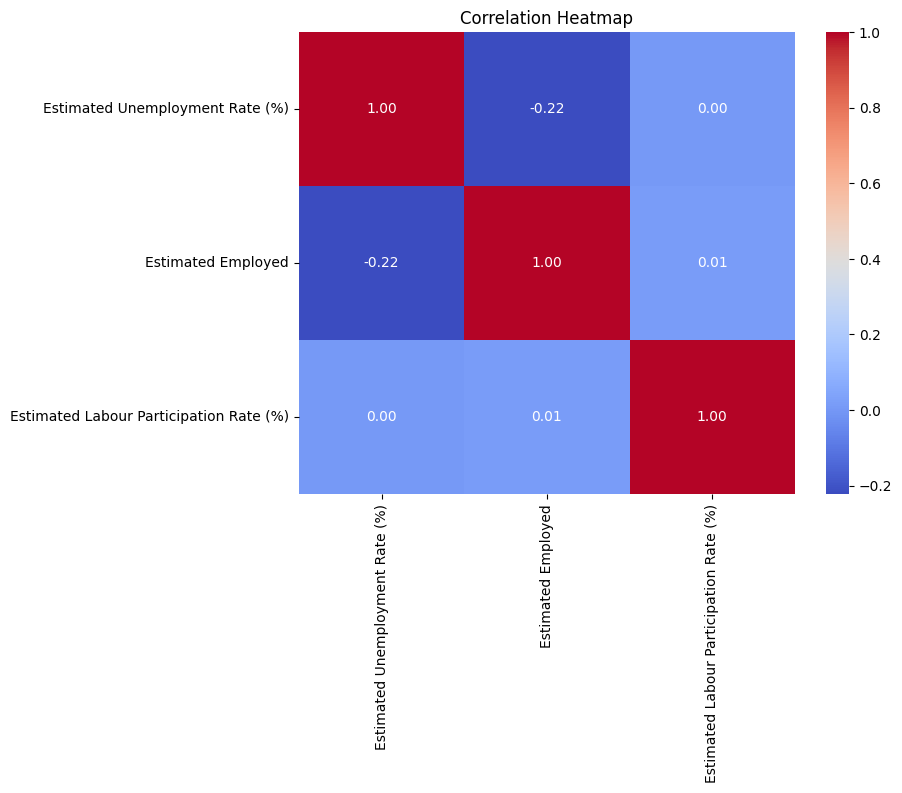

In [23]:

# Calculate correlation matrix
correlation = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


1. When unemployment rates go up, the number of employed people tends to go down, showing an opposite relationship.
2. Changes in unemployment rates don't have much effect on how many people are participating in the job market overall.
3. More people having jobs might slightly increase the number of people willing to work, but the effect isn't very strong.

In [24]:
# Example: Test if there is a significant difference in unemployment rates between urban and rural areas
from scipy.stats import ttest_ind

urban_unemployment = df[df['Area'] == 'Urban']['Estimated Unemployment Rate (%)']
rural_unemployment = df[df['Area'] == 'Rural']['Estimated Unemployment Rate (%)']

t_stat, p_val = ttest_ind(urban_unemployment, rural_unemployment)
print(f'T-Statistic: {t_stat:.2f}')
print(f'P-Value: {p_val:.2f}')

# Interpret the results based on the significance level (e.g., 0.05)

T-Statistic: 3.63
P-Value: 0.00


### 5.10 Countplot for Area

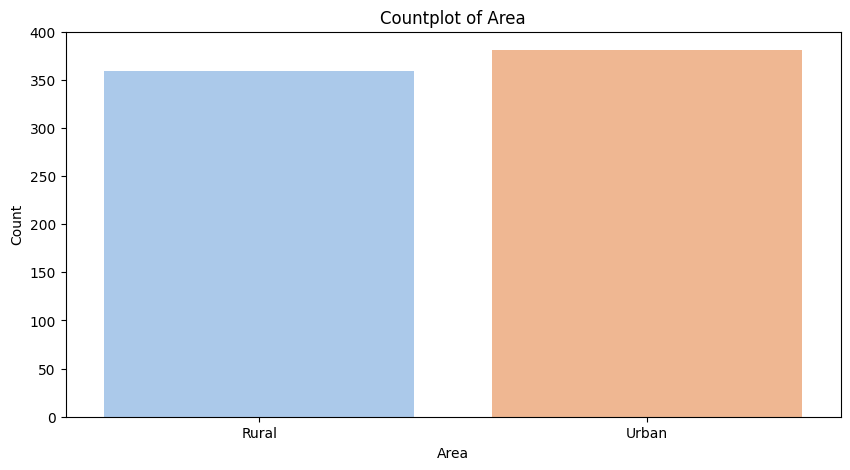

In [25]:
# make countplot for Area
fig = plt.figure(figsize=(10, 5))
sns.countplot(x='Area', data=df,palette='pastel')
plt.title('Countplot of Area')
plt.xlabel('Area')
plt.ylabel('Count')
# save the plot
plt.savefig('countplot_area.png', dpi=300)
plt.show()

### 5.11 Countplot for Region

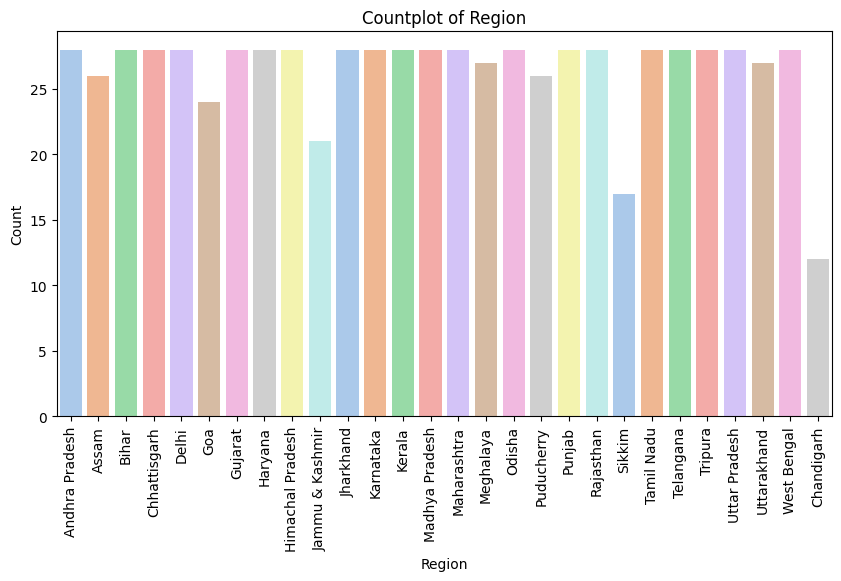

In [26]:
# make countplot for Region
plt.figure(figsize=(10, 5))
sns.countplot(x='Region', data=df,palette='pastel')
plt.xticks(rotation ='vertical')
plt.title('Countplot of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()